This code sets up a momentum-based trading strategy for Nvidia stock by calculating short-term and long-term moving averages and relative strength against the S&P 500. Trading signals are generated based on the crossover of the moving averages. The results are then plotted for visualization

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
C:\Users\user\AppData\Local\Temp\ipykernel_15716\1053899716.py:20: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

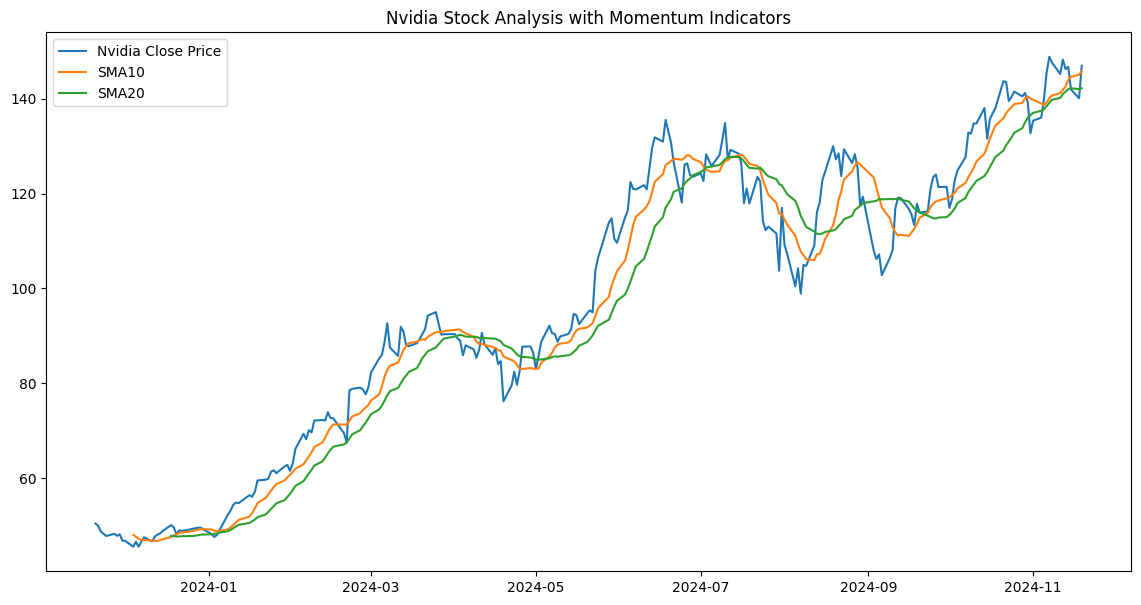

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Fetch Nvidia stock data
nvidia_data = yf.download('NVDA', period='1y', interval='1d')

# Calculate momentum indicators
nvidia_data['SMA10'] = nvidia_data['Close'].rolling(window=10).mean()
nvidia_data['SMA20'] = nvidia_data['Close'].rolling(window=20).mean()

# Calculate relative strength against a benchmark index (e.g., S&P 500)
sp500_data = yf.download('^GSPC', period='1y', interval='1d')
nvidia_data['Relative_Strength'] = nvidia_data['Close'] / sp500_data['Close']

# Generate trading signals
nvidia_data['Signal'] = 0
nvidia_data['Signal'][nvidia_data['SMA10'] > nvidia_data['SMA20']] = 1
nvidia_data['Signal'][nvidia_data['SMA10'] < nvidia_data['SMA20']] = -1

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(nvidia_data['Close'], label='Nvidia Close Price')
plt.plot(nvidia_data['SMA10'], label='SMA10')
plt.plot(nvidia_data['SMA20'], label='SMA20')
plt.title('Nvidia Stock Analysis with Momentum Indicators')
plt.legend()
plt.show()